In [9]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import numpy as np
from astropy.io import ascii
from astropy.table import Table
import csv

In [10]:
cadence=26
t_list_years=[200,220,220.5,221,221.5,222,222.5,223,223.5,224,224.5,225]
t_list_cadence=[int(i*cadence) for i in t_list_years]
run=50
cluster_size=2000
steps=7800
stars=2000

## start with total mass

In [11]:
burst2000_5bin=np.load('/home/lee/data/2000stars_only/burst2000_5.npy')
L2000_5bin=np.load('/home/lee/data/2000stars_only/L2000_5.npy')
C2000_5bin=np.load('/home/lee/data/2000stars_only/C2000_5.npy')

In [12]:
num0_5bin=0
num3_5bin=0
num6_5bin=0
num16_5bin=0
num40_5bin=0
num100_5bin=0
num0_list_5bin=[]
num3_list_5bin=[]
num6_list_5bin=[]
num16_list_5bin=[]
num40_list_5bin=[]
num100_list_5bin=[]
run=50

for i in range(run):
    for j in range(stars):
        for k in range(steps):
            if C2000_5bin[i,j,k]==0:
                num0_5bin+=1
            elif C2000_5bin[i,j,k]==3:
                num3_5bin+=1
            elif C2000_5bin[i,j,k]==6:
                num6_5bin+=1
            elif C2000_5bin[i,j,k]==16:
                num16_5bin+=1    
            elif C2000_5bin[i,j,k]==40:
                num40_5bin+=1
            elif C2000_5bin[i,j,k]==100:
                num100_5bin+=1
    num0_list_5bin.append(num0_5bin)
    num3_list_5bin.append(num3_5bin)
    num6_list_5bin.append(num6_5bin)
    num16_list_5bin.append(num16_5bin)
    num40_list_5bin.append(num40_5bin)
    num100_list_5bin.append(num100_5bin)
    num0_5bin=0
    num3_5bin=0
    num6_5bin=0
    num16_5bin=0
    num40_5bin=0
    num100_5bin=0

In [13]:
num100_final_5bin=[]
for i in range(run):
    num100_final_5bin.append(num100_list_5bin[i]*100)
    
num40_final_5bin=[]
for i in range(run):
    num40_final_5bin.append(num40_list_5bin[i]*40)
    
num16_final_5bin=[]
for i in range(run):
    num16_final_5bin.append(num16_list_5bin[i]*16)
    
num6_final_5bin=[]
for i in range(run):
    num6_final_5bin.append(num6_list_5bin[i]*6)
    
num3_final_5bin=[]
for i in range(run):
    num3_final_5bin.append(num3_list_5bin[i]*3)
    
num0_final_5bin=[]
for i in range(run):
    num0_final_5bin.append(num0_list_5bin[i]*1)

In [14]:
number0_5bin=np.sum(num0_final_5bin)
number3_5bin=np.sum(num3_final_5bin)
number6_5bin=np.sum(num6_final_5bin)
number40_5bin=np.sum(num40_final_5bin)
number16_5bin=np.sum(num16_final_5bin)
number100_5bin=np.sum(num100_final_5bin)
total_5bin=number100_5bin+number40_5bin+number16_5bin+number6_5bin+number3_5bin+number0_5bin

y0=number0_5bin/total_5bin
y1=number3_5bin/total_5bin
y2=number6_5bin/total_5bin
y3=number16_5bin/total_5bin
y4=number40_5bin/total_5bin
y5=number100_5bin/total_5bin

print(y0,y1,y2,y3,y4,y5)

0.49869053257379375 0.09382696534204327 0.11625429556356989 0.09749032024242578 0.09818431426321785 0.09555357201494948


In [15]:
num100_total_5bin=[]
num40_total_5bin=[]
num16_total_5bin=[]
num3_total_5bin=[]
num6_total_5bin=[]
num0_total_5bin=[]
for i in range(run):
    total5=num100_final_5bin[i]+num40_final_5bin[i]+num16_final_5bin[i]+num6_final_5bin[i]+num3_final_5bin[i]+num0_final_5bin[i]
    num100_total_5bin.append(100*num100_final_5bin[i]/total5)
    num40_total_5bin.append(100*num40_final_5bin[i]/total5)
    num16_total_5bin.append(100*num16_final_5bin[i]/total5)
    num3_total_5bin.append(100*num3_final_5bin[i]/total5)
    num6_total_5bin.append(100*num6_final_5bin[i]/total5)
    num0_total_5bin.append(100*num0_final_5bin[i]/total5)

In [16]:
mean0=np.mean(num0_total_5bin)
std0=np.std(num0_total_5bin)
mean3=np.mean(num3_total_5bin)
std3=np.std(num3_total_5bin)
mean6=np.mean(num6_total_5bin)
std6=np.std(num6_total_5bin)
mean16=np.mean(num16_total_5bin)
std16=np.std(num16_total_5bin)
mean40=np.mean(num40_total_5bin)
std40=np.std(num40_total_5bin)
mean100=np.mean(num100_total_5bin)
std100=np.std(num100_total_5bin)

/tmp/ipykernel_100837/887943531.py:69: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','3x','6x','16x','40x','100x'])


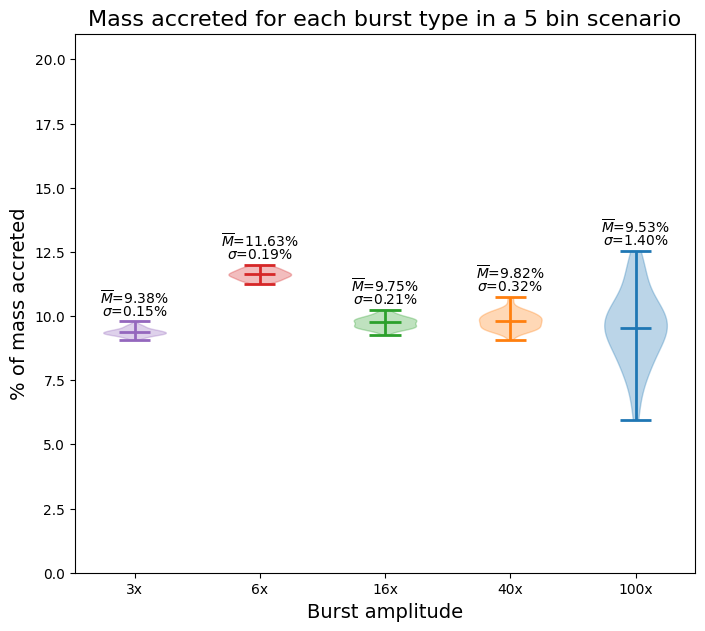

In [17]:
fig,ax1=plt.subplots()
fig.set_size_inches(8,7)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='sans serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

v100=ax1.violinplot(num100_total_5bin,positions=[5],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)
    
    
v40=ax1.violinplot(num40_total_5bin,positions=[4],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v40['bodies']:
    pc.set_facecolor('#ff7f0e')
    pc.set_edgecolor('#ff7f0e')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v40[partname]
    vp.set_edgecolor('#ff7f0e')
    vp.set_linewidth(2)

v16=ax1.violinplot(num16_total_5bin,positions=[3],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v16['bodies']:
    pc.set_facecolor('#2ca02c')
    pc.set_edgecolor('#2ca02c')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v16[partname]
    vp.set_edgecolor('#2ca02c')
    vp.set_linewidth(2)
    
v6=ax1.violinplot(num6_total_5bin,positions=[2],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v6['bodies']:
    pc.set_facecolor('#d62728')
    pc.set_edgecolor('#d62728')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v6[partname]
    vp.set_edgecolor('#d62728')
    vp.set_linewidth(2)

v3=ax1.violinplot(num3_total_5bin,positions=[1],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v3['bodies']:
    pc.set_facecolor('#9467bd')
    pc.set_edgecolor('#9467bd')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v3[partname]
    vp.set_edgecolor('#9467bd')
    vp.set_linewidth(2)
    
#v0=ax1.violinplot(num0_total_5bin,positions=[1],vert=True, widths=0.5, showmeans=True, showextrema=True)
#for pc in v0['bodies']:
#    pc.set_facecolor('#8c564b')
#    pc.set_edgecolor('#8c564b')
#    pc.set_alpha(0.3)
#for partname in ('cbars','cmins','cmaxes','cmeans',):
#    vp=v0[partname]
#    vp.set_edgecolor('#8c564b')
#    vp.set_linewidth(2) 
    
ax1.set_xticklabels(['0','3x','6x','16x','40x','100x'])
ax1.set_ylabel('% of mass accreted',fontsize=14)
ax1.set_xlabel('Burst amplitude',fontsize=14)
    
string0mean='{:.2f}%'.format(np.mean(num0_total_5bin))
string0std='{:.2f}%'.format(np.std(num0_total_5bin))
string3mean='{:.2f}%'.format(np.mean(num3_total_5bin))
string3std='{:.2f}%'.format(np.std(num3_total_5bin))
string6mean='{:.2f}%'.format(np.mean(num6_total_5bin))
string6std='{:.2f}%'.format(np.std(num6_total_5bin))
string16mean='{:.2f}%'.format(np.mean(num16_total_5bin))
string16std='{:.2f}%'.format(np.std(num16_total_5bin))
string40mean='{:.2f}%'.format(np.mean(num40_total_5bin))
string40std='{:.2f}%'.format(np.std(num40_total_5bin))
string100mean='{:.2f}%'.format(np.mean(num100_total_5bin))
string100std='{:.2f}%'.format(np.std(num100_total_5bin))

ax1.set_ylim(0,21)
#ax1.text(1,np.min(num0_total_5bin)-2,'$\overline{M}$='+string0mean,ha='center')
#ax1.text(1,np.min(num0_total_5bin)-3.75,'$\sigma$='+string0std,ha='center')
ax1.text(1,np.max(num3_total_5bin)+0.7,'$\overline{M}$='+string3mean,ha='center')
ax1.text(1,np.max(num3_total_5bin)+0.25,'$\sigma$='+string3std,ha='center')
ax1.text(2,np.max(num6_total_5bin)+0.7,'$\overline{M}$='+string6mean,ha='center')
ax1.text(2,np.max(num6_total_5bin)+0.25,'$\sigma$='+string6std,ha='center')
ax1.text(3,np.max(num16_total_5bin)+0.7,'$\overline{M}$='+string16mean,ha='center')
ax1.text(3,np.max(num16_total_5bin)+0.25,'$\sigma$='+string16std,ha='center')
ax1.text(4,np.max(num40_total_5bin)+0.7,'$\overline{M}$='+string40mean,ha='center')
ax1.text(4,np.max(num40_total_5bin)+0.25,'$\sigma$='+string40std,ha='center')
ax1.text(5,np.max(num100_total_5bin)+0.7,'$\overline{M}$='+string100mean,ha='center')
ax1.text(5,np.max(num100_total_5bin)+0.25,'$\sigma$='+string100std,ha='center')
plt.title('Mass accreted for each burst type in a 5 bin scenario',fontsize=16)
plt.show()    

## observed mass

In [18]:
L2000=np.load('/home/lee/data/cluster_size_change/100x_burst/L2000.npy')

#100
cluster_size2000=2000
cad_L2000=np.zeros((run,cluster_size2000,12))
for i in range(run):
    for j in range(cluster_size2000):
        for k in range(len(t_list_cadence)):
            cad_L2000[i,j,k]=L2000[i,j,t_list_cadence[k]]

obs_burst2000=np.zeros((run,cluster_size2000,12))
for i in range(run):
    for k in range(cluster_size2000):
        for j in range(1,12):
            if cad_L2000[i,k,j]-cad_L2000[i,k,j-1]==5:
                    obs_burst2000[i,k,j-30:j]=1
            elif cad_L2000[i,k,j-1]-cad_L2000[i,k,j]==5:
                    obs_burst2000[i,k,j:j+30]=1


#40
obs_burst2000=np.zeros((run,cluster_size2000,12))
for i in range(run):
    for k in range(cluster_size2000):
        for j in range(1,12):
            if j==1:
                if cad_L2000[i,k,j]-cad_L2000[i,k,j-1]==4:
                    obs_burst2000[i,k,j-1]=1
                elif cad_L2000[i,k,j-1]-cad_L2000[i,k,j]==4:
                    if cad_L2000[i,k,j]!=cad_L2000[i,k,j+1]:
                        obs_burst2000[i,k,j]=1
                    elif cad_L2000[i,k,j]==cad_L2000[i,k,j+1]:
                        obs_burst2000[i,k,j:j+2]=1
            else:
                if cad_L2000[i,k,j]-cad_L2000[i,k,j-1]==4:
                    obs_burst2000[i,k,j-6:j]=1 
                    obs_burst2000[i,k,0]=0
                elif cad_L2000[i,k,j-1]-cad_L2000[i,k,j]==4:
                    obs_burst2000[i,k,j:j+6]=1
                    print(i,k)

#16
obs_burst2000=np.zeros((run,cluster_size2000,12))
for i in range(run):
    for k in range(cluster_size2000):
        for j in range(1,12):
            if j==1:
                if cad_L2000[i,k,j]-cad_L2000[i,k,j-1]==3:
                    obs_burst2000[i,k,j-1]=1
                elif cad_L2000[i,k,j-1]-cad_L2000[i,k,j]==3:
                    if cad_L2000[i,k,j]!=cad_L2000[i,k,j+1]:
                        obs_burst2000[i,k,j]=1
                    elif cad_L2000[i,k,j]==cad_L2000[i,k,j+1]:
                        obs_burst2000[i,k,j:j+2]=1
                        print(i,k)
            else:
                if cad_L2000[i,k,j-1]-cad_L2000[i,k,j]==3:
                    obs_burst2000[i,k,j:j+2]=1
                if cad_L2000[i,k,j]-cad_L2000[i,k,j-1]==3:
                    obs_burst2000[i,k,j-2:j]=1

#6
obs_burst2000=np.zeros((run,cluster_size2000,12))
for i in range(run):
    for k in range(cluster_size2000):
        for j in range(1,12):
            if j==1:
                if cad_L2000[i,k,j]-cad_L2000[i,k,j-1]==2:
                    obs_burst2000[i,k,j-1]=1
                elif cad_L2000[i,k,j-1]-cad_L2000[i,k,j]==2:
                    if cad_L2000[i,k,j]!=cad_L2000[i,k,j+1]:
                        obs_burst2000[i,k,j]=1
                    elif cad_L2000[i,k,j]==cad_L2000[i,k,j+1]:
                        obs_burst2000[i,k,j:j+2]=1
            else:
                if cad_L2000[i,k,j]-cad_L2000[i,k,j-1]==2:
                    obs_burst2000[i,k,j-6:j]=1 
                    obs_burst2000[i,k,0]=0
                elif cad_L2000[i,k,j-1]-cad_L2000[i,k,j]==2:
                    obs_burst2000[i,k,j:j+6]=1

#3
obs_burst2000=np.zeros((run,cluster_size2000,32))
for i in range(run):
    for k in range(cluster_size2000):
        for j in range(1,12):
            if cad_L2000[i,k,j]-cad_L2000[i,k,j-1]==1.25:
                obs_burst2000[i,k,j-1]=1
            if cad_L2000[i,k,j-1]-cad_L2000[i,k,j]==1.25:
               obs_burst2000[i,k,j]=1


num100_2000=0
list100_2000=[]
num0_2000=0
list0_2000=[]

for i in range(run):
    for k in range(cluster_size2000):
        for j in range(0,12):
            if obs_burst2000[i,k,j]==1:
                num100_2000+=1
            elif obs_burst2000[i,k,j]==0:
                num0_2000+=1
    list100_2000.append(num100_2000)
    num100_2000=0
    list0_2000.append(num0_2000)
    num0_2000=0

mass100_2000=[]
mass0_2000=[]
for i in range(run):
    mass100_2000.append(list100_2000[i]*100)
    mass0_2000.append(list0_2000[i]*1)

frac100_2000=[]
frac0_2000=[]
for i in range(run):
    total2000=mass100_2000[i]+mass0_2000[i]
    frac100_2000.append(100*mass100_2000[i]/total2000)
    frac0_2000.append(100*mass0_2000[i]/total2000)

In [19]:
print(np.shape(L2000))

(50, 2000, 7800)


In [30]:
L2000=np.load('/home/lee/data/2000stars_only/L2000_5.npy')
run=50

#100
cluster_size2000=2000
cad_L2000=np.zeros((run,cluster_size2000,12))
for i in range(run):
    for j in range(cluster_size2000):
        for k in range(len(t_list_cadence)):
            cad_L2000[i,j,k]=L2000[i,j,t_list_cadence[k]]

obs_burst2000=np.zeros((run,cluster_size2000,12))
for i in range(run):
    for k in range(cluster_size2000):
        for j in range(1,12):
            if cad_L2000[i,k,j]-cad_L2000[i,k,j-1]==5:
                    obs_burst2000[i,k,j-30:j]=100
            elif cad_L2000[i,k,j-1]-cad_L2000[i,k,j]==5:
                    obs_burst2000[i,k,j:j+30]=100


#40
for i in range(run):
    for k in range(cluster_size2000):
        for j in range(1,12):
            if j==1:
                if cad_L2000[i,k,j]-cad_L2000[i,k,j-1]==4:
                    obs_burst2000[i,k,j-1]=40
                elif cad_L2000[i,k,j-1]-cad_L2000[i,k,j]==4:
                    if cad_L2000[i,k,j]!=cad_L2000[i,k,j+1]:
                        obs_burst2000[i,k,j]=40
                    elif cad_L2000[i,k,j]==cad_L2000[i,k,j+1]:
                        obs_burst2000[i,k,j:j+2]=1
            else:
                if cad_L2000[i,k,j]-cad_L2000[i,k,j-1]==4:
                    obs_burst2000[i,k,j-6:j]=40
                    obs_burst2000[i,k,0]=0
                elif cad_L2000[i,k,j-1]-cad_L2000[i,k,j]==4:
                    obs_burst2000[i,k,j:j+6]=40

#16 
for i in range(run):
    for k in range(cluster_size2000):
        for j in range(1,12):
            if j==1:
                if cad_L2000[i,k,j]-cad_L2000[i,k,j-1]==3:
                    obs_burst2000[i,k,j-1]=16
                elif cad_L2000[i,k,j-1]-cad_L2000[i,k,j]==3:
                    if cad_L2000[i,k,j]!=cad_L2000[i,k,j+1]:
                        obs_burst2000[i,k,j]=16
                    elif cad_L2000[i,k,j]==cad_L2000[i,k,j+1]:
                        obs_burst2000[i,k,j:j+2]=16
            else:
                if cad_L2000[i,k,j-1]-cad_L2000[i,k,j]==3:
                    obs_burst2000[i,k,j:j+2]=16
                if cad_L2000[i,k,j]-cad_L2000[i,k,j-1]==3:
                    obs_burst2000[i,k,j-2:j]=16

#3
for i in range(run):
    for k in range(cluster_size2000):
        for j in range(1,12):
            if cad_L2000[i,k,j]-cad_L2000[i,k,j-1]==1.25:
                obs_burst2000[i,k,j-1]=3
            elif cad_L2000[i,k,j-1]-cad_L2000[i,k,j]==1.25:
               obs_burst2000[i,k,j]=3

for i in range(run):
    for k in range(cluster_size2000):
        for j in range(1,12):
            if j==1:
                if cad_L2000[i,k,j]-cad_L2000[i,k,j-1]==2:
                    obs_burst2000[i,k,j-1]=6
                elif cad_L2000[i,k,j-1]-cad_L2000[i,k,j]==2:
                    if cad_L2000[i,k,j]!=cad_L2000[i,k,j+1]:
                        obs_burst2000[i,k,j]=6
                    elif cad_L2000[i,k,j]==cad_L2000[i,k,j+1]:
                        obs_burst2000[i,k,j:j+2]=6
            else:
                if cad_L2000[i,k,j]-cad_L2000[i,k,j-1]==2:
                    obs_burst2000[i,k,j-6:j]=6
                    obs_burst2000[i,k,0]=0
                elif cad_L2000[i,k,j-1]-cad_L2000[i,k,j]==2:
                    obs_burst2000[i,k,j:j+6]=6
                    print(i,k)

0 10
0 11
0 25
0 42
0 44
0 56
0 78
0 90
0 111
0 115
0 116
0 129
0 146
0 148
0 186
0 199
0 247
0 249
0 302
0 317
0 323
0 348
0 353
0 369
0 376
0 393
0 401
0 422
0 428
0 457
0 466
0 503
0 527
0 529
0 551
0 577
0 600
0 604
0 682
0 683
0 698
0 701
0 745
0 760
0 803
0 810
0 828
0 841
0 860
0 861
0 865
0 868
0 882
0 900
0 907
0 916
0 923
0 936
0 937
0 938
0 998
0 1020
0 1103
0 1127
0 1128
0 1183
0 1185
0 1193
0 1205
0 1227
0 1293
0 1302
0 1314
0 1319
0 1332
0 1427
0 1441
0 1447
0 1449
0 1456
0 1473
0 1483
0 1496
0 1499
0 1503
0 1523
0 1527
0 1550
0 1694
0 1706
0 1727
0 1755
0 1770
0 1792
0 1816
0 1820
0 1830
0 1831
0 1841
0 1842
0 1861
0 1878
0 1901
0 1918
0 1929
0 1953
0 1994
1 10
1 13
1 17
1 27
1 39
1 108
1 132
1 262
1 281
1 306
1 339
1 405
1 415
1 424
1 438
1 450
1 524
1 541
1 545
1 581
1 595
1 627
1 650
1 685
1 697
1 757
1 790
1 815
1 857
1 862
1 874
1 890
1 894
1 928
1 950
1 955
1 993
1 1016
1 1034
1 1068
1 1106
1 1110
1 1112
1 1123
1 1167
1 1168
1 1213
1 1253
1 1296
1 1308
1 1359
1 136

In [31]:
print(obs_burst2000[0,28,:])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [32]:
num3_2000=0
list3_2000=[]
num6_2000=0
list6_2000=[]
num16_2000=0
list16_2000=[]
num40_2000=0
list40_2000=[]
num100_2000=0
list100_2000=[]
num0_2000=0
list0_2000=[]

for i in range(run):
    for k in range(cluster_size2000):
        for j in range(0,12):
            if obs_burst2000[i,k,j]==3:
                num3_2000+=1
            elif obs_burst2000[i,k,j]==6:
                num6_2000+=1 
            elif obs_burst2000[i,k,j]==16:
                num16_2000+=1 
            elif obs_burst2000[i,k,j]==40:
                num40_2000+=1 
            elif obs_burst2000[i,k,j]==100:
                num100_2000+=1 
            elif obs_burst2000[i,k,j]==0:
                num0_2000+=1
    list3_2000.append(num3_2000)
    num3_2000=0
    list6_2000.append(num6_2000)
    num6_2000=0
    list16_2000.append(num16_2000)
    num16_2000=0
    list40_2000.append(num40_2000)
    num40_2000=0
    list100_2000.append(num100_2000)
    num100_2000=0
    list0_2000.append(num0_2000)
    num0_2000=0

In [33]:
print(list0_2000)

[21821, 21784, 21688, 21705, 21700, 21682, 21764, 21794, 21821, 21814, 21854, 21782, 21692, 21877, 21679, 21700, 21765, 21724, 21834, 21703, 21761, 21788, 21763, 21832, 21746, 21838, 21775, 21778, 21813, 21835, 21695, 21770, 21791, 21723, 21777, 21743, 21826, 21821, 21839, 21837, 21792, 21754, 21809, 21782, 21806, 21793, 21725, 21716, 21812, 21774]


In [34]:
mass3_2000=[]
mass6_2000=[]
mass16_2000=[]
mass40_2000=[]
mass100_2000=[]
mass0_2000=[]
for i in range(run):
    mass3_2000.append(list3_2000[i]*3)
    mass6_2000.append(list6_2000[i]*6)
    mass16_2000.append(list16_2000[i]*16)
    mass40_2000.append(list40_2000[i]*40)
    mass100_2000.append(list100_2000[i]*100)
    mass0_2000.append(list0_2000[i]*1)

In [35]:
print(mass3_2000)

[3417, 3666, 3504, 3504, 3654, 3567, 3501, 3759, 3549, 3549, 3552, 3498, 3684, 3645, 3846, 3783, 3573, 3606, 3510, 3525, 3663, 3591, 3582, 3477, 3669, 3651, 3402, 3702, 3441, 3552, 3618, 3537, 3648, 3498, 3519, 3573, 3534, 3480, 3579, 3450, 3597, 3729, 3396, 3549, 3633, 3675, 3762, 3864, 3588, 3375]


In [36]:
frac3_2000=[]
frac6_2000=[]
frac16_2000=[]
frac40_2000=[]
frac100_2000=[]
frac0_2000=[]
for i in range(run):
    total2000=mass3_2000[i]+mass6_2000[i]+mass16_2000[i]+mass40_2000[i]+mass100_2000[i]+mass0_2000[i]
    frac3_2000.append(100*mass3_2000[i]/total2000)
    frac6_2000.append(100*mass6_2000[i]/total2000)
    frac16_2000.append(100*mass16_2000[i]/total2000)
    frac40_2000.append(100*mass40_2000[i]/total2000)
    frac100_2000.append(100*mass100_2000[i]/total2000)
    frac0_2000.append(100*mass0_2000[i]/total2000)

In [37]:
#means and std
mean3=np.mean(frac3_2000)
std3=np.std(frac3_2000)
mean6=np.mean(frac6_2000)
std6=np.std(frac6_2000)
mean16=np.mean(frac16_2000)
std16=np.std(frac16_2000)
mean40=np.mean(frac40_2000)
std40=np.std(frac40_2000)
mean100=np.mean(frac100_2000)
std100=np.std(frac100_2000)

In [38]:
print(mean16)

9.261964974142364


/tmp/ipykernel_100837/2488730179.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','3x','6x','16x','40x','100x'])


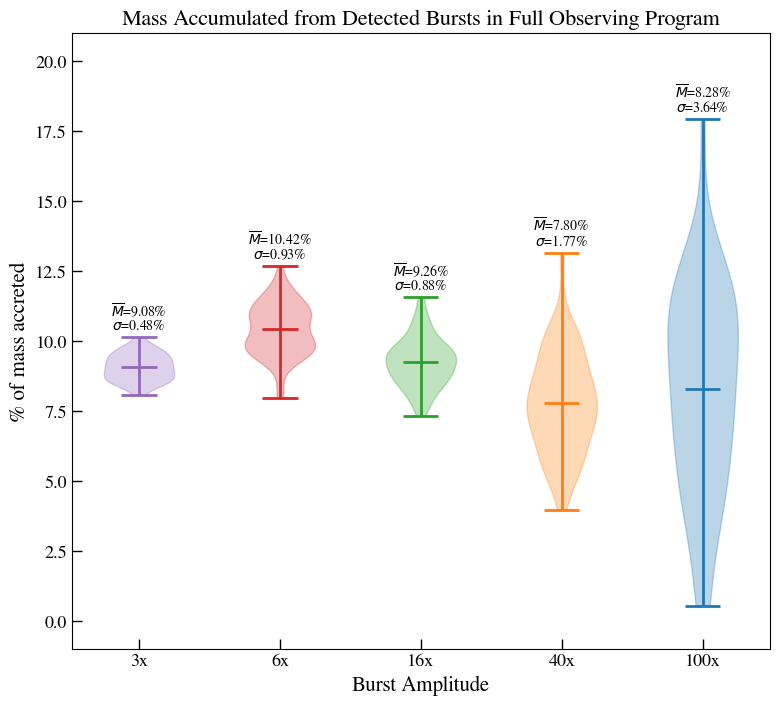

In [50]:
fig,ax1=plt.subplots()
fig.set_size_inches(9,8)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='FreeSerif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

v100=ax1.violinplot(frac3_2000,positions=[1],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#9467bd')
    pc.set_edgecolor('#9467bd')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#9467bd')
    vp.set_linewidth(2)
    
v0=ax1.violinplot(frac6_2000,positions=[2],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#d62728')
    pc.set_edgecolor('#d62728')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#d62728')
    vp.set_linewidth(2) 

v0=ax1.violinplot(frac16_2000,positions=[3],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#2ca02c')
    pc.set_edgecolor('#2ca02c')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#2ca02c')
    vp.set_linewidth(2) 
    
v0=ax1.violinplot(frac40_2000,positions=[4],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#ff7f0e')
    pc.set_edgecolor('#ff7f0e')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#ff7f0e')
    vp.set_linewidth(2) 
    
v0=ax1.violinplot(frac100_2000,positions=[5],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2) 
    
ax1.set_xticklabels(['0','3x','6x','16x','40x','100x'])
ax1.set_ylabel('% of mass accreted',fontsize=15)
ax1.set_xlabel('Burst Amplitude',fontsize=15)
ax1.tick_params(axis='both',which='major', length=7, width=1, direction='in',labelsize=13)
    
string3mean='{:.2f}%'.format(mean3)
string3std='{:.2f}%'.format(std3)
string6mean='{:.2f}%'.format(mean6)
string6std='{:.2f}%'.format(std6)
string16mean='{:.2f}%'.format(mean16)
string16std='{:.2f}%'.format(std16)
string40mean='{:.2f}%'.format(mean40)
string40std='{:.2f}%'.format(std40)
string100mean='{:.2f}%'.format(mean100)
string100std='{:.2f}%'.format(std100)

#ax1.locator_params(axis='x',nbins=2)
ax1.set_ylim(-1,21)
ax1.text(1,np.max(frac3_2000)+0.75,'$\overline{M}$='+string3mean,ha='center')
ax1.text(1,np.max(frac3_2000)+0.25,'$\sigma$='+string3std,ha='center')
ax1.text(2,np.max(frac6_2000)+0.75,'$\overline{M}$='+string6mean,ha='center')
ax1.text(2,np.max(frac6_2000)+0.25,'$\sigma$='+string6std,ha='center')
ax1.text(3,np.max(frac16_2000)+0.75,'$\overline{M}$='+string16mean,ha='center')
ax1.text(3,np.max(frac16_2000)+0.25,'$\sigma$='+string16std,ha='center')
ax1.text(4,np.max(frac40_2000)+0.75,'$\overline{M}$='+string40mean,ha='center')
ax1.text(4,np.max(frac40_2000)+0.25,'$\sigma$='+string40std,ha='center')
ax1.text(5,np.max(frac100_2000)+0.75,'$\overline{M}$='+string100mean,ha='center')
ax1.text(5,np.max(frac100_2000)+0.25,'$\sigma$='+string100std,ha='center')



plt.title('Mass Accumulated from Detected Bursts in Full Observing Program',fontsize=16)
plt.savefig('/home/lee/research/figs/observational/observational_mass_size_change_violinplot16x.jpeg',dpi=300,bbox_inches='tight')
plt.show()  

## combine them

/tmp/ipykernel_27871/3363326677.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['S.S.','3x','6x','16x','40x','100x'])
/tmp/ipykernel_27871/3363326677.py:136: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['S.S.','3x','6x','16x','40x','100x'])
/tmp/ipykernel_27871/3363326677.py:174: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['S.S.','3x','6x','16x','40x','100x'])
/tmp/ipykernel_27871/3363326677.py:175: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['S.S.','3x','6x','16x','40x','100x'])


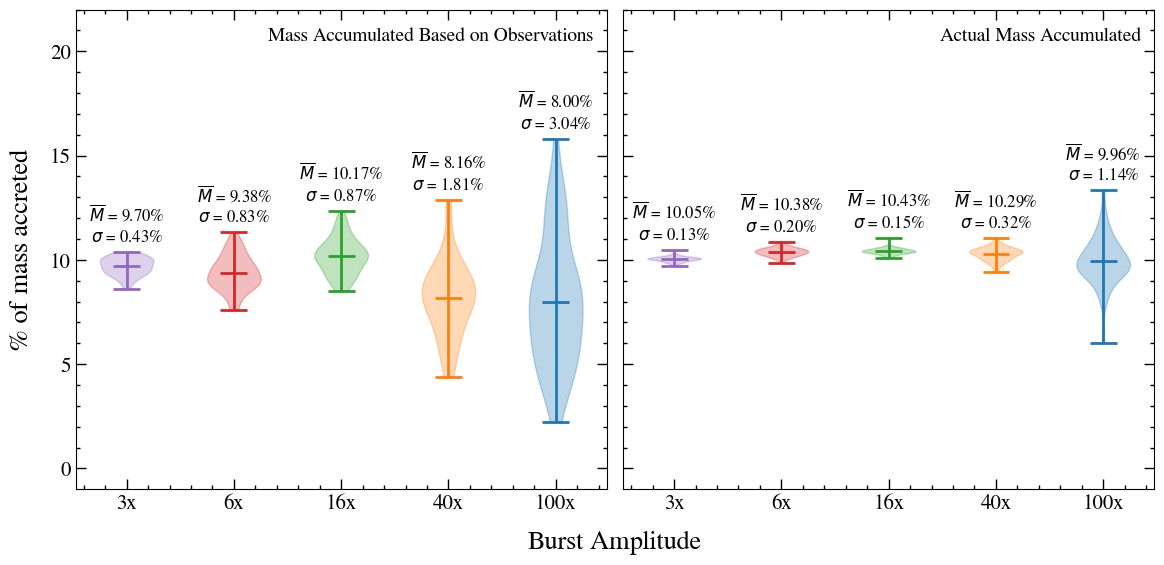

In [21]:
fig,((ax2,ax1))=plt.subplots(1,2,sharey='row',sharex='row')
fig.set_size_inches(12,6)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='FreeSerif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

v100=ax1.violinplot(num100_total_5bin,positions=[5],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)
    
    
v40=ax1.violinplot(num40_total_5bin,positions=[4],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v40['bodies']:
    pc.set_facecolor('#ff7f0e')
    pc.set_edgecolor('#ff7f0e')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v40[partname]
    vp.set_edgecolor('#ff7f0e')
    vp.set_linewidth(2)

v16=ax1.violinplot(num16_total_5bin,positions=[3],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v16['bodies']:
    pc.set_facecolor('#2ca02c')
    pc.set_edgecolor('#2ca02c')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v16[partname]
    vp.set_edgecolor('#2ca02c')
    vp.set_linewidth(2)
    
v6=ax1.violinplot(num6_total_5bin,positions=[2],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v6['bodies']:
    pc.set_facecolor('#d62728')
    pc.set_edgecolor('#d62728')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v6[partname]
    vp.set_edgecolor('#d62728')
    vp.set_linewidth(2)

v3=ax1.violinplot(num3_total_5bin,positions=[1],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v3['bodies']:
    pc.set_facecolor('#9467bd')
    pc.set_edgecolor('#9467bd')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v3[partname]
    vp.set_edgecolor('#9467bd')
    vp.set_linewidth(2)
    
ax1.set_xticklabels(['S.S.','3x','6x','16x','40x','100x'])
    
string0mean='{:.2f}%'.format(np.mean(num0_total_5bin))
string0std='{:.2f}%'.format(np.std(num0_total_5bin))
string3mean='{:.2f}%'.format(np.mean(num3_total_5bin))
string3std='{:.2f}%'.format(np.std(num3_total_5bin))
string6mean='{:.2f}%'.format(np.mean(num6_total_5bin))
string6std='{:.2f}%'.format(np.std(num6_total_5bin))
string16mean='{:.2f}%'.format(np.mean(num16_total_5bin))
string16std='{:.2f}%'.format(np.std(num16_total_5bin))
string40mean='{:.2f}%'.format(np.mean(num40_total_5bin))
string40std='{:.2f}%'.format(np.std(num40_total_5bin))
string100mean='{:.2f}%'.format(np.mean(num100_total_5bin))
string100std='{:.2f}%'.format(np.std(num100_total_5bin))

ax1.set_ylim(-1,21)
ax1.text(1,np.max(num3_total_5bin)+1.5,'$\overline{M}$ = '+string3mean,ha='center',fontsize=12)
ax1.text(1,np.max(num3_total_5bin)+0.5,'$\sigma$ = '+string3std,ha='center',fontsize=12)
ax1.text(2,np.max(num6_total_5bin)+1.5,'$\overline{M}$ = '+string6mean,ha='center',fontsize=12)
ax1.text(2,np.max(num6_total_5bin)+0.5,'$\sigma$ = '+string6std,ha='center',fontsize=12)
ax1.text(3,np.max(num16_total_5bin)+1.5,'$\overline{M}$ = '+string16mean,ha='center',fontsize=12)
ax1.text(3,np.max(num16_total_5bin)+0.5,'$\sigma$ = '+string16std,ha='center',fontsize=12)
ax1.text(4,np.max(num40_total_5bin)+1.5,'$\overline{M}$ = '+string40mean,ha='center',fontsize=12)
ax1.text(4,np.max(num40_total_5bin)+0.5,'$\sigma$ = '+string40std,ha='center',fontsize=12)
ax1.text(5,np.max(num100_total_5bin)+1.5,'$\overline{M}$ = '+string100mean,ha='center',fontsize=12)
ax1.text(5,np.max(num100_total_5bin)+0.5,'$\sigma$ = '+string100std,ha='center',fontsize=12)

v100=ax2.violinplot(frac3_2000,positions=[1],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#9467bd')
    pc.set_edgecolor('#9467bd')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#9467bd')
    vp.set_linewidth(2)
    
v0=ax2.violinplot(frac6_2000,positions=[2],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#d62728')
    pc.set_edgecolor('#d62728')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#d62728')
    vp.set_linewidth(2) 

v0=ax2.violinplot(frac16_2000,positions=[3],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#2ca02c')
    pc.set_edgecolor('#2ca02c')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#2ca02c')
    vp.set_linewidth(2) 
    
v0=ax2.violinplot(frac40_2000,positions=[4],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#ff7f0e')
    pc.set_edgecolor('#ff7f0e')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#ff7f0e')
    vp.set_linewidth(2) 
    
v0=ax2.violinplot(frac100_2000,positions=[5],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2) 
    
ax2.set_xticklabels(['S.S.','3x','6x','16x','40x','100x'])
    
string3mean='{:.2f}%'.format(mean3)
string3std='{:.2f}%'.format(std3)
string6mean='{:.2f}%'.format(mean6)
string6std='{:.2f}%'.format(std6)
string16mean='{:.2f}%'.format(mean16)
string16std='{:.2f}%'.format(std16)
string40mean='{:.2f}%'.format(mean40)
string40std='{:.2f}%'.format(std40)
string100mean='{:.2f}%'.format(mean100)
string100std='{:.2f}%'.format(std100)

ax2.set_ylim(-1,22)
ax2.text(1,np.max(frac3_2000)+1.5,'$\overline{M}$ = '+string3mean,ha='center',fontsize=12)
ax2.text(1,np.max(frac3_2000)+0.5,'$\sigma$ = '+string3std,ha='center',fontsize=12)
ax2.text(2,np.max(frac6_2000)+1.5,'$\overline{M}$ = '+string6mean,ha='center',fontsize=12)
ax2.text(2,np.max(frac6_2000)+0.5,'$\sigma$ = '+string6std,ha='center',fontsize=12)
ax2.text(3,np.max(frac16_2000)+1.5,'$\overline{M}$ = '+string16mean,ha='center',fontsize=12)
ax2.text(3,np.max(frac16_2000)+0.5,'$\sigma$ = '+string16std,ha='center',fontsize=12)
ax2.text(4,np.max(frac40_2000)+1.5,'$\overline{M}$ = '+string40mean,ha='center',fontsize=12)
ax2.text(4,np.max(frac40_2000)+0.5,'$\sigma$ = '+string40std,ha='center',fontsize=12)
ax2.text(5,np.max(frac100_2000)+1.5,'$\overline{M}$ = '+string100mean,ha='center',fontsize=12)
ax2.text(5,np.max(frac100_2000)+0.5,'$\sigma$ = '+string100std,ha='center',fontsize=12)

ax1.locator_params(axis='y',nbins=6)
ax1.tick_params(axis='both',right=False,top=False,which='both')
ax1.tick_params(axis='both',which='major', length=7, width=1, direction='in',labelsize=15)
ax2.locator_params(axis='y',nbins=6)
ax2.tick_params(axis='both',right=False,top=False,which='both')
ax2.tick_params(axis='both',which='major', length=7, width=1, direction='in',labelsize=15)

ax3=fig.add_subplot(111,frameon=False)
#plt.tick_params(labelcolor='none',top='off',bottom='off',left='off',right='off',which='both',axis='both')
plt.minorticks_off()
plt.grid(False)
ax3.set_yticks([])
ax3.set_xticks([])
ax1.set_xticklabels(['S.S.','3x','6x','16x','40x','100x'])
ax2.set_xticklabels(['S.S.','3x','6x','16x','40x','100x'])
ax3.set_ylabel('% of mass accreted',fontsize=19,labelpad=30)
ax3.set_xlabel('Burst Amplitude',fontsize=19,labelpad=30)

ax1.minorticks_on()
ax1.tick_params(axis='both',right=True,top=True,which='both')
ax1.tick_params(axis='both',which='major', length=7, width=1, direction='in',labelsize=15)
ax1.tick_params(axis='both',which='minor', length=3, width=1, direction='in',labelsize=15)
ax2.minorticks_on()
ax2.yaxis.set_ticks_position('both')
ax2.tick_params(axis='both',right=True,top=True,which='both')
ax2.tick_params(axis='both',which='major', length=7, width=1, direction='in',labelsize=15)
ax2.tick_params(axis='both',which='minor', length=3, width=1, direction='in',labelsize=15)

fig.tight_layout()

ax1.text(5.35,20.5,'Actual Mass Accumulated',ha='right',fontsize=14)
ax2.text(5.35,20.5,'Mass Accumulated Based on Observations',ha='right',fontsize=14)

plt.savefig('/home/lee/research/figs/observational/observational_mass_5bins_SidexSide.jpeg',dpi=300,bbox_inches='tight')
plt.show()    

/tmp/ipykernel_100837/3909485516.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['S.S.','3x','6x','16x','40x','100x'])


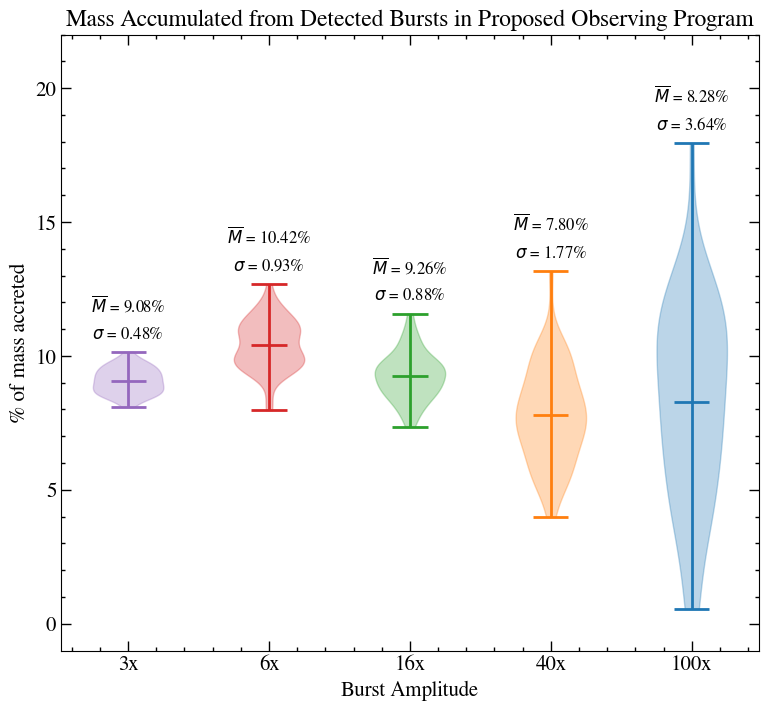

In [53]:
fig,ax2=plt.subplots()
fig.set_size_inches(9,8)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='FreeSerif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

v100=ax2.violinplot(frac3_2000,positions=[1],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#9467bd')
    pc.set_edgecolor('#9467bd')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#9467bd')
    vp.set_linewidth(2)
    
v0=ax2.violinplot(frac6_2000,positions=[2],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#d62728')
    pc.set_edgecolor('#d62728')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#d62728')
    vp.set_linewidth(2) 

v0=ax2.violinplot(frac16_2000,positions=[3],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#2ca02c')
    pc.set_edgecolor('#2ca02c')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#2ca02c')
    vp.set_linewidth(2) 
    
v0=ax2.violinplot(frac40_2000,positions=[4],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#ff7f0e')
    pc.set_edgecolor('#ff7f0e')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#ff7f0e')
    vp.set_linewidth(2) 
    
v0=ax2.violinplot(frac100_2000,positions=[5],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2) 
    
ax2.set_xticklabels(['S.S.','3x','6x','16x','40x','100x'])
    
string3mean='{:.2f}%'.format(mean3)
string3std='{:.2f}%'.format(std3)
string6mean='{:.2f}%'.format(mean6)
string6std='{:.2f}%'.format(std6)
string16mean='{:.2f}%'.format(mean16)
string16std='{:.2f}%'.format(std16)
string40mean='{:.2f}%'.format(mean40)
string40std='{:.2f}%'.format(std40)
string100mean='{:.2f}%'.format(mean100)
string100std='{:.2f}%'.format(std100)

ax2.set_ylim(-1,22)
ax2.text(1,np.max(frac3_2000)+1.5,'$\overline{M}$ = '+string3mean,ha='center',fontsize=12)
ax2.text(1,np.max(frac3_2000)+0.5,'$\sigma$ = '+string3std,ha='center',fontsize=12)
ax2.text(2,np.max(frac6_2000)+1.5,'$\overline{M}$ = '+string6mean,ha='center',fontsize=12)
ax2.text(2,np.max(frac6_2000)+0.5,'$\sigma$ = '+string6std,ha='center',fontsize=12)
ax2.text(3,np.max(frac16_2000)+1.5,'$\overline{M}$ = '+string16mean,ha='center',fontsize=12)
ax2.text(3,np.max(frac16_2000)+0.5,'$\sigma$ = '+string16std,ha='center',fontsize=12)
ax2.text(4,np.max(frac40_2000)+1.5,'$\overline{M}$ = '+string40mean,ha='center',fontsize=12)
ax2.text(4,np.max(frac40_2000)+0.5,'$\sigma$ = '+string40std,ha='center',fontsize=12)
ax2.text(5,np.max(frac100_2000)+1.5,'$\overline{M}$ = '+string100mean,ha='center',fontsize=12)
ax2.text(5,np.max(frac100_2000)+0.5,'$\sigma$ = '+string100std,ha='center',fontsize=12)

ax1.locator_params(axis='y',nbins=6)
ax1.tick_params(axis='both',right=False,top=False,which='both')
ax1.tick_params(axis='both',which='major', length=7, width=1, direction='in',labelsize=15)
ax2.locator_params(axis='y',nbins=6)
ax2.tick_params(axis='both',right=False,top=False,which='both')
ax2.tick_params(axis='both',which='major', length=7, width=1, direction='in',labelsize=15)

ax2.locator_params(axis='y',nbins=6)
ax2.tick_params(axis='both',right=False,top=False,which='both')
ax2.tick_params(axis='both',which='major', length=7, width=1, direction='in',labelsize=15)

ax2.minorticks_on()
ax2.yaxis.set_ticks_position('both')
ax2.tick_params(axis='both',right=True,top=True,which='both')
ax2.tick_params(axis='both',which='major', length=7, width=1, direction='in',labelsize=15)
ax2.tick_params(axis='both',which='minor', length=3, width=1, direction='in',labelsize=15)

ax2.set_ylabel('% of mass accreted',fontsize=15)
ax2.set_xlabel('Burst Amplitude',fontsize=15)
ax2.set_title('Mass Accumulated from Detected Bursts in Proposed Observing Program',fontsize=17)

plt.savefig('/home/lee/research/figs/observational/observational_mass_5bins.jpeg',dpi=300,bbox_inches='tight')
plt.show() 

## 4 bins

In [6]:
burst2000_4bin=np.load('/home/lee/data/2000stars_only/burst2000_5.npy')
L2000_4bin=np.load('/home/lee/data/2000stars_only/L2000_5.npy')
C2000_4bin=np.load('/home/lee/data/2000stars_only/C2000_5.npy')

In [7]:
num0_4bin=0
num100_4bin=0
num0_list_4bin=[]
num100_list_4bin=[]
run=50

for i in range(run):
    for j in range(stars):
        for k in range(steps):
            if C2000_4bin[i,j,k]==0:
                num0_4bin+=1 
            elif C2000_4bin[i,j,k]==100:
                num100_4bin+=1
    num0_list_4bin.append(num0_4bin)
    num100_list_4bin.append(num100_4bin)
    num0_4bin=0
    num100_4bin=0

In [8]:
print(np.mean(num100_list_4bin))

26673.5


In [18]:
num100_final_4bin=[]
for i in range(run):
    num100_final_4bin.append(num100_list_4bin[i]*100)
    
num0_final_4bin=[]
for i in range(run):
    num0_final_4bin.append(num0_list_4bin[i]*1)

In [19]:
number0_4bin=np.sum(num0_final_4bin)
number100_4bin=np.sum(num100_final_4bin)
total_4bin=number100_4bin+number0_4bin

y0=number0_4bin/total_4bin
y5=number100_4bin/total_4bin

print(y0,y5)

0.5178110643867423 0.4821889356132577


In [23]:
N2000_5bin=np.load('/home/lee/data/2000stars_only/final_2000_5.npy')

In [28]:
new_burst2000_5=np.zeros((2000,8580))

In [29]:
print(new_burst2000_5)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
